In [1]:
import sys
sys.path.append('../')
import sys
import os
from statannotations.Annotator import Annotator
# Add the subfolder to sys.path

# Import the function or module
# Load model from HuggingFace Hub
# code to import python libraries and set up the notebook
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import colorcet as cc
from scipy.stats import pearsonr, spearmanr

pd.set_option("display.precision", 2)
palette = sns.color_palette(cc.glasbey_hv, n_colors=25)
sns.set_theme(style="whitegrid", palette=palette) 

In [2]:
classification_results_df = pd.read_csv("reference_resolution_results.csv")
classification_results_df

,Embedding Type,Round,Task,Hidden Layer Sizes,Epochs,Batch Size,Learning Rate,macro_precision,macro_recall,macro_f1,micro_precision,micro_recall,micro_f1,accuracy
0,Random,Round 1,Reference Resolution,"[300, 150]",200,32,1.00e-04,1.45e-02,1.75e-02,1.46e-02,0.03,0.03,0.03,0.03
1,Random,Round 2,Reference Resolution,"[300, 150]",200,32,1.00e-04,9.51e-03,1.23e-02,1.02e-02,0.02,0.02,0.02,0.02
2,Random,Round 3,Reference Resolution,"[300, 150]",200,32,1.00e-04,8.42e-03,1.36e-02,9.82e-03,0.04,0.04,0.04,0.04
3,Random,Round 4,Reference Resolution,"[300, 150]",200,32,1.00e-04,1.14e-02,1.23e-02,1.16e-02,0.03,0.03,0.03,0.03
4,Random,Round 5,Reference Resolution,"[300, 150]",200,32,1.00e-04,9.96e-03,1.03e-02,9.27e-03,0.03,0.03,0.03,0.03
5,Random,Round 6,Reference Resolution,"[300, 150]",200,32,1.00e-04,1.85e-02,7.23e-03,8.70e-03,0.03,0.03,0.03,0.03
6,Multimodal-X,Round 1,Reference Resolution,"[300, 150]",200,32,1.00e-04,8.75e-02,8.60e-02,7.78e-02,0.12,0.12,0.12,0.12
7,Multimodal-X,Round 2,Reference Resolution,"[300, 150]",200,32,1.00e-04,9.18e-02,9.61e-02,8.79e-02,0.14,0.14,0.14,0.14
8,Multimodal-X,Round 3,Reference Resolution,"[300, 150]",200,32,1.00e-04,1.24e-01,1.24e-01,1.17e-01,0.18,0.18,0.18,0.18
9,Multimodal-X,Round 4,Reference Resolution,"[300, 150]",200,32,1.00e-04,1.63e-01,1.63e-01,1.44e-01,0.22,0.22,0.22,0.22


# Reference Resolution: Section 5.1

In [3]:
all_modalities = [
    'Random',
    'Multimodal-X',
    'Unimodal',
    'Multimodal',
    'Semantic',
    'Semantic + Unimodal',
    'Semantic + Multimodal',
    'Semantic  +Multimodal-X',
]

all_colors = sns.color_palette("Paired", n_colors=len(all_modalities))

color_mapping = dict(zip(all_modalities, all_colors))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Unimodal: t-test paired samples, P_val:7.553e-04 t=-7.300e+00
Unimodal vs. Multimodal: t-test paired samples, P_val:9.870e-03 t=-4.045e+00
Multimodal vs. Multimodal-X: t-test paired samples, P_val:6.443e-01 t=4.909e-01


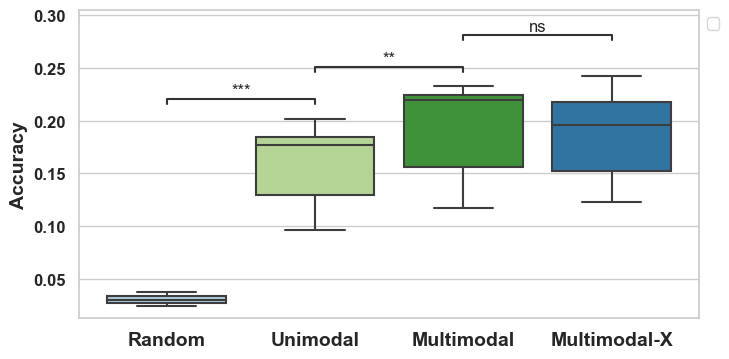

In [4]:
plt.figure(figsize=(8, 4))
order = ['Random', 'Unimodal', 'Multimodal', 'Multimodal-X']

section_6_1_classification_results_df = classification_results_df[
    classification_results_df['Embedding Type'].isin(order)
].copy()

section_6_1_classification_results_df['Embedding Type'] = pd.Categorical(
    section_6_1_classification_results_df['Embedding Type'],
    categories=order,
    ordered=True
)

# Define a palette that respects the order
current_palette = {modality: color_mapping[modality] for modality in order}

ax = sns.boxplot(
    data=section_6_1_classification_results_df,
    y='accuracy',
    x='Embedding Type',
    hue='Embedding Type',
    dodge=False,
    linewidth=1.5,
    palette=current_palette,
    order=order,
    hue_order=order
)

# Define pairs for annotation (adjacent pairs in the order)
pairs = [(order[i], order[i+1]) for i in range(len(order)-1)]

# Annotate the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('')
plt.ylabel('Accuracy', fontsize=14, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
# plt.xticks(rotation=45)

annotator = Annotator(
    ax, 
    data=section_6_1_classification_results_df,
    x='Embedding Type', 
    y='accuracy',
    pairs=pairs,
    order=order
)
annotator.configure(test='t-test_paired', text_format='star', loc='inside', verbose=2)  # , hide_non_significant=True
annotator.apply_and_annotate()

plt.savefig("reference_resolution_with_gestures.pdf", bbox_inches='tight', dpi=300, transparent=True, format='pdf')


# Section 5.2

/var/folders/w_/bf2mvf1d6wn_jx4fx0k7bs1m0000gp/T/ipykernel_15666/3577073726.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Unimodal vs. Multimodal-X: t-test paired samples, P_val:1.708e-02 t=-3.511e+00
Multimodal-X vs. Semantic: t-test paired samples, P_val:5.859e-03 t=-4.597e+00
Semantic vs. Semantic + Unimodal: t-test paired samples, P_val:1.067e-02 t=-3.967e+00
Semantic + Unimodal vs. Semantic + Multimodal: t-test paired samples, P_val:8.776e-03 t=-4.166e+00


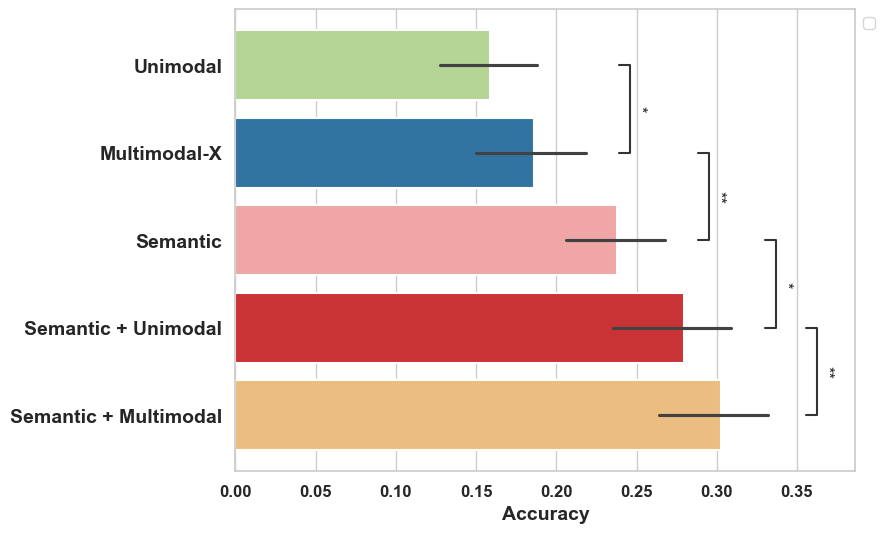

In [5]:
plt.figure(figsize=(8, 6))
order = [
  'Unimodal',
   'Multimodal-X',
  'Semantic',
  'Semantic + Unimodal',
   'Semantic + Multimodal']



section_6_2_classification_results_df = classification_results_df[
    classification_results_df['Embedding Type'].isin(order)
].copy()

section_6_2_classification_results_df['Embedding Type'] = pd.Categorical(
    section_6_2_classification_results_df['Embedding Type'],
    categories=order,
    ordered=True
)

current_palette = {modality: color_mapping[modality] for modality in order}

ax = sns.barplot(
    data=section_6_2_classification_results_df,
    x='accuracy',
    y='Embedding Type',
    orient='h',
    hue='Embedding Type',
    dodge=False,
    linewidth=1.5,
    ci=95,
    palette=color_mapping  
)
pairs = []
for i in range(0, len(order)-1):
      pairs.append((order[i], order[i+1]))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel('')
plt.xlabel('Accuracy', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
annotator = Annotator(ax, data=section_6_2_classification_results_df, y='Embedding Type', x='accuracy', pairs=pairs, orient='h')#, palette='Paired')
annotator.configure(test='t-test_paired', text_format='star', loc='inside', verbose=2)#, hide_non_significant=True)
annotator.apply_and_annotate()

plt.savefig("reference_resolution_with_semantic.pdf", bbox_inches='tight', dpi=300, transparent=True, format='pdf')

# Section 5.3

/var/folders/w_/bf2mvf1d6wn_jx4fx0k7bs1m0000gp/T/ipykernel_15666/3037748479.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 50)` for the same effect.

  ax = sns.lineplot(


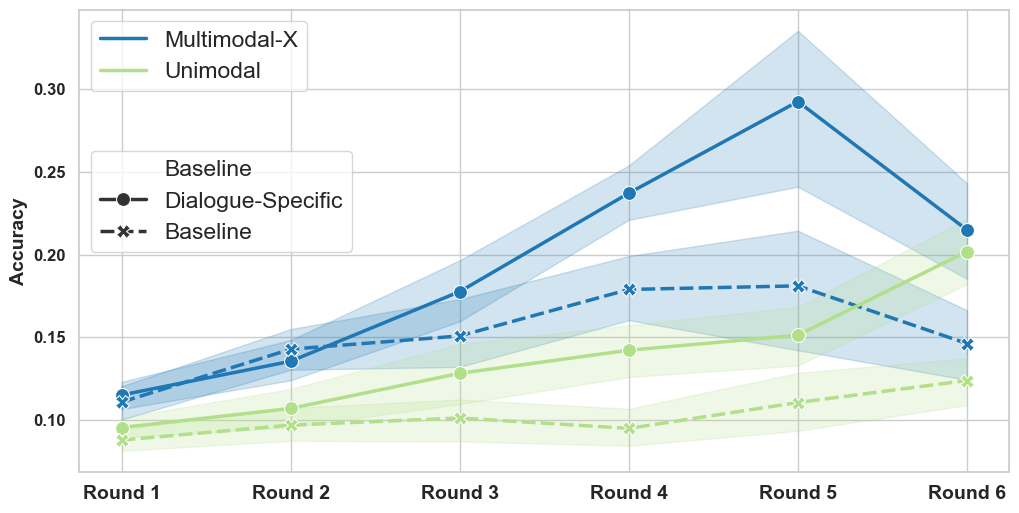

In [7]:
incremental_classification_df = pd.read_csv('reference_resolution_with_dialogue_history_results.csv')
incremental_classification_df = incremental_classification_df.drop_duplicates()
incremental_classification_df['Baseline'] = incremental_classification_df['Baseline'].replace({True: 'Baseline', False: 'Dialogue-Specific'})

# remove Gesture (Semantic) from the Embedding Type column

current_palette = {modality: color_mapping[modality] for modality in incremental_classification_df['Embedding Type'].unique()}
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(12, 6))
# Create the initial plot
ax = sns.lineplot(
    data=incremental_classification_df,
    x='Round',
    y='micro_f1',
    hue='Embedding Type',
    style='Baseline',
    markers=True,
    markersize=10,
    linewidth=2.5,
    palette=current_palette,
    ci=50,
    style_order=['Dialogue-Specific', 'Baseline'],
)
plt.grid()
# Retrieve handles and labels from the current legend
handles, labels = ax.get_legend_handles_labels()

# The legend entries are combined; inspect them to decide how to split.
# For instance, suppose the first two entries correspond to the embedding types
# and the next two to the baseline models. (Adjust the slicing based on your data.)
embedding_handles = handles[1:3]
embedding_labels = labels[1:3]
baseline_handles = handles[3:]
baseline_labels = labels[3:]

legend1 = plt.legend(embedding_handles, embedding_labels, title="", loc="upper left")
legend1.set_title('') 
ax.add_artist(legend1)

legend2 = plt.legend(baseline_handles, baseline_labels, title="", loc="upper left", bbox_to_anchor=(0, 0.72))
legend2.set_title('') 


# Set labels and ticks
plt.xlabel('')
plt.ylabel('Accuracy', fontsize=14, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.grid()

# Save the figure
plt.savefig("classification_with_dialogue_history.pdf", dpi=300, bbox_inches="tight", transparent=True)